In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
import os
from iob import style_transfer, utils

In [2]:
%cd ../

d:\dev\project\Neural-Style-Transfer


torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])


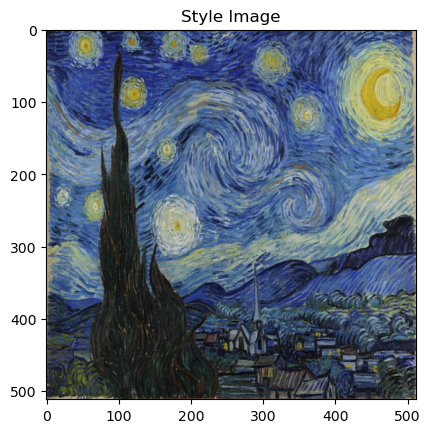

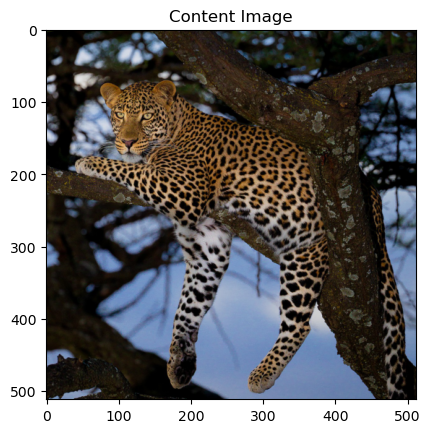

In [3]:
content_path = os.path.join(os.getcwd(), 'content_images')
style_path = os.path.join(os.getcwd(), 'style_images')
output_path = os.path.join(os.getcwd(), 'output_images')

content_img_name = "leopard.jpg"
style_img_name = "starry_night.jpg"
ctin = content_img_name.split('.')[0]
stin = style_img_name.split('.')[0]

content_img = utils.image_loader(os.path.join(content_path, content_img_name))
style_img = utils.image_loader(os.path.join(style_path, style_img_name))

print(style_img.size(), content_img.size())
assert style_img.size() == content_img.size(), \
    "Style and content images must be the same size"

plt.figure()
utils.imshow(style_img, title='Style Image')

plt.figure()
utils.imshow(content_img, title='Content Image')

In [4]:
content_img.shape

torch.Size([1, 3, 512, 512])

In [5]:
model = style_transfer.StyleTransfer()

output = model.run_style_transfer(os.path.join(content_path, content_img_name), os.path.join(style_path, style_img_name), num_steps=300)

d:\anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])


d:\dev\project\Neural-Style-Transfer\src\iob\layers.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1).to(device)
d:\dev\project\Neural-Style-Transfer\src\iob\layers.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1).to(device)


Optimizing...
Step 50: Style Loss: 0.000215 Content Loss: 16.317795
Step 100: Style Loss: 0.000045 Content Loss: 10.650821
Step 150: Style Loss: 0.000022 Content Loss: 8.714072
Step 200: Style Loss: 0.000014 Content Loss: 7.635241
Step 250: Style Loss: 0.000012 Content Loss: 7.063370
Step 300: Style Loss: 0.000010 Content Loss: 6.754610


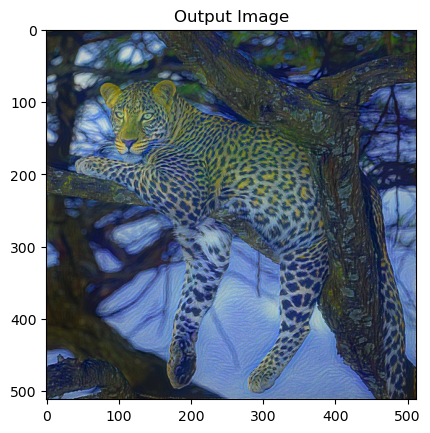

In [6]:
plt.figure()
utils.imshow(output, title='Output Image')
plt.ioff()
plt.show()

In [7]:
content_image_2 = utils.unloader(content_img.cpu().clone().squeeze(0))

In [8]:
output_image = output.cpu().clone()  # Clone the tensor to not do changes on it
output_image = output_image.squeeze(0)  # Remove the fake batch dimension
output_image = utils.unloader(output_image)  # Reconvert into PIL image

In [9]:
original_color_output = utils.original_colors(content_image_2, output_image)
original_color_output.save(os.path.join(output_path, f'{ctin}_styled_as_{stin}.jpg'))
# plt.figure()
# utils.imshow(original_color_output, title='Output Image')
# plt.ioff()
# plt.show()